In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Different \#threads comparison

<Axes: title={'center': 'w/ syn_50k_1M (local)'}, xlabel='num_threads', ylabel='time[ms]'>

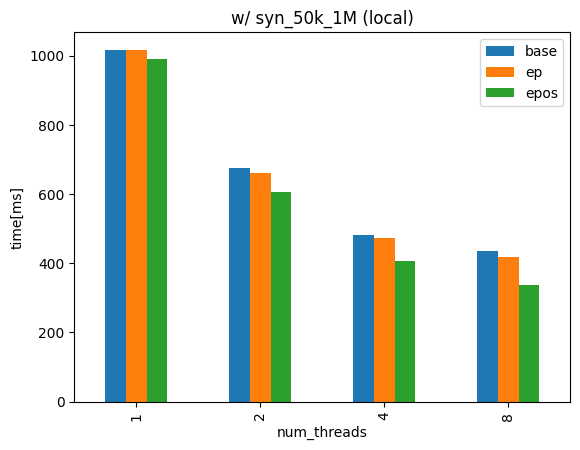

In [2]:
info = pd.read_csv("syn_50k_1M_diffThread.csv")

info\
    .drop(columns=["spark"])\
    .plot(x="num_threads", ylabel="time[ms]", kind="bar", stacked=False, title="w/ syn_50k_1M (local)")

<Axes: title={'center': 'w/ syn_1M_10M (local)'}, xlabel='num_threads', ylabel='time[ms]'>

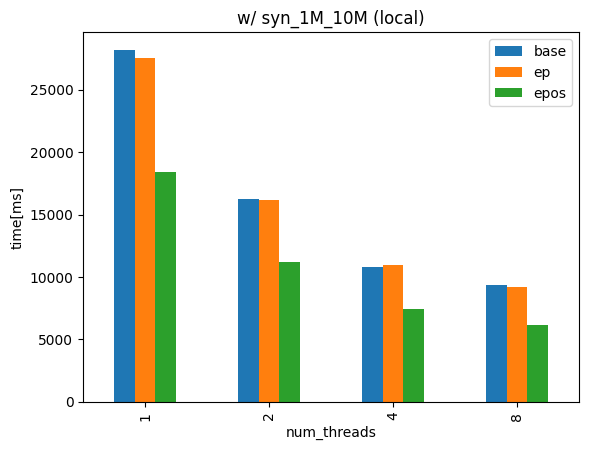

In [11]:
info = pd.read_csv("syn_1M_10M_diffThread.csv")

info\
    .plot(x="num_threads", ylabel="time[ms]", kind="bar", stacked=False, title="w/ syn_1M_10M (local)")

w/ syn_2M_10M

<Axes: title={'center': 'w/ syn_2M_10M (local)'}, xlabel='num_threads', ylabel='time[ms]'>

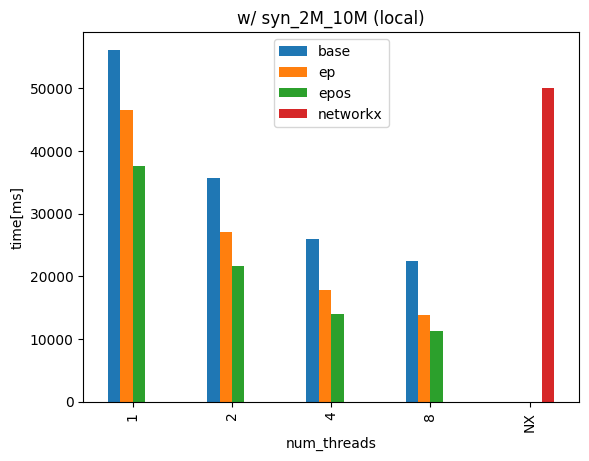

In [13]:
info = pd.read_csv("syn_2M_10M_diffThread.csv")

info\
    .plot(x="num_threads", ylabel="time[ms]", kind="bar", stacked=False, title="w/ syn_2M_10M (local)")